In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings

ruta_yelp_tips = "C:\\Users\\licle\\Desktop\\PF\\DATASET-PARQUET\\yelp_tip.parquet"

In [2]:
tips = pd.read_parquet(ruta_yelp_tips)

In [3]:
tips.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [4]:
#Tipos de datos
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [5]:
#¿Hay Valores Nulos?
tips.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [6]:
#¿Se repiten los usuarios?
tips.user_id.value_counts()

user_id
fCvMnJU1Z-XhAjKg99wK3Q    4071
5Y5KbsI5buMcNh2hTFaRpA    1385
lMY8NBPyzlPbbu-KBYfD9A    1373
Rr4cLb6Go91FT134o6RsKg    1230
qjfMBIZpQT9DDtw_BWCopQ    1230
                          ... 
M-q6aVScljiJ09vdIzDxWA       1
X01tGj-AFQFr634yFAXF8w       1
SyQjE8WDUItQM_Q_axaoXg       1
gQ6w_mMSsLotwSm1LQjMfQ       1
v48Spe6WEpqehsF2xQADpg       1
Name: count, Length: 301758, dtype: int64

In [7]:
#¿Se repiten los negocios?
tips.business_id.value_counts()

business_id
FEXhWNCMkv22qG04E83Qjg    2571
-QI8Qi8XWH3D8y8ethnajA    1011
_ab50qdWOk0DdB6XOrBitw     932
ytynqOUb3hjKeJfRj5Tshw     827
Eb1XmmLWyt_way5NNZ7-Pw     826
                          ... 
JnQd5ZdfFhIDDq1CTcSaaA       1
xRaddmd73rkdLxUx7Grtcg       1
JjRSWWCp8Yd2gnqIMY0DiA       1
4D2NVjVRANfHaROxuqlkDA       1
QqDz0hQ7iPpHJAd9JOTudQ       1
Name: count, Length: 106193, dtype: int64

In [9]:
#¿Se repiten conteo de cumplidos?
tips.compliment_count.value_counts()

compliment_count
0    898376
1      9821
2       617
3        82
4        14
5         3
6         2
Name: count, dtype: int64

Filtramos toda la columna de Comentarios ya que no cuenta con Nulos

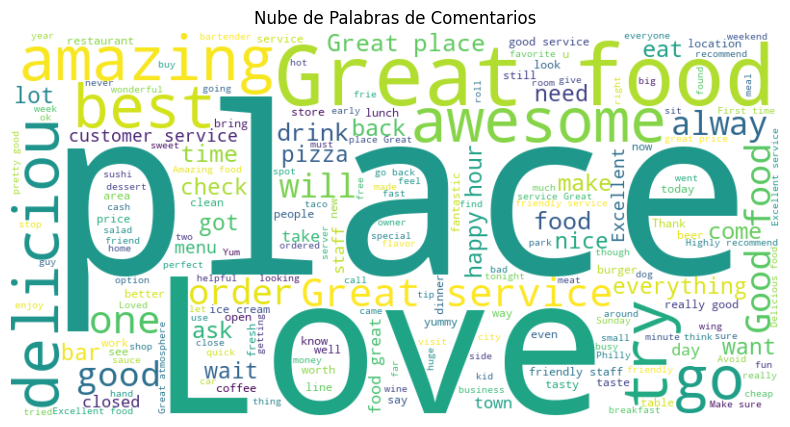

In [10]:
#Nube de Palabras con todas las reseñas

# Filtra los valores nulos en la columna 'review'
filtered_text = tips['text']

# Crea un solo string con todas las reseñas filtradas
all_text = " ".join(str(review) for review in filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios')
plt.show()

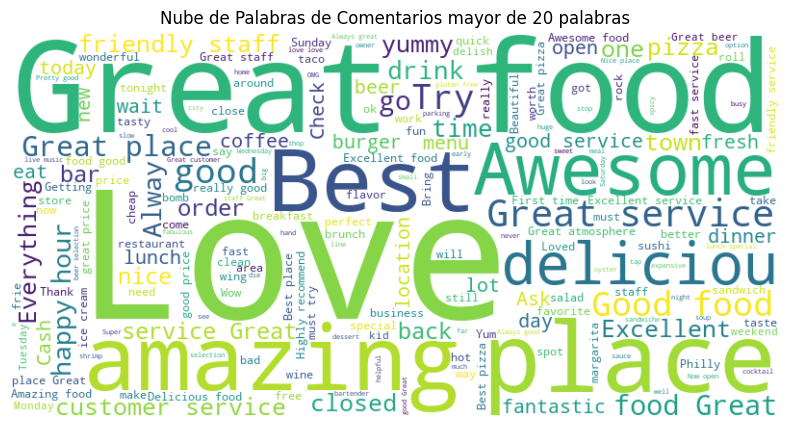

In [12]:
#Nube de Palabras de Comentarios solo con los que tengan de 2 a 10 palabras

# Filtra los Comentarios por longitud (2 a 10 palabras)
filtered_text = tips[tips['text'].apply(lambda x: isinstance(x, str) and 2 <= len(x.split()) <= 10)]['text']

# Crea un solo string con todas las reseñas filtradas
all_text = " ".join(str(review) for review in filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios mayor de 20 palabras')
plt.show()

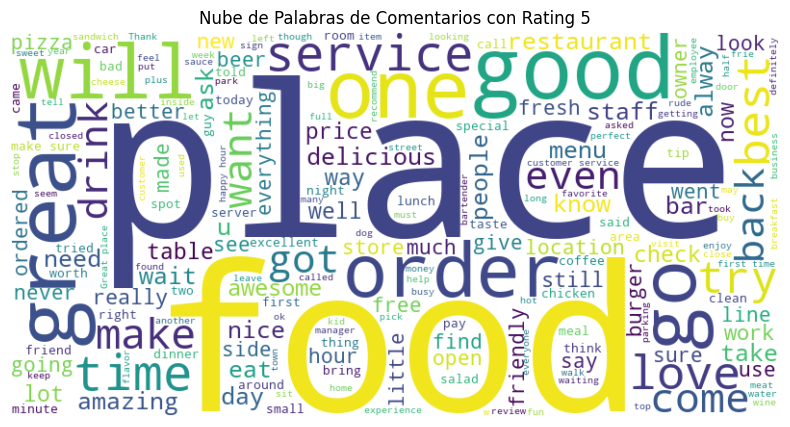

In [13]:
#Nube de Palabras de Comentarios solo con los que tengan mayor de 20 palabras

# Filtra los Comentarios por longitud mayor de 20 palabras
filtered_text = tips[tips['text'].apply(lambda x: isinstance(x, str) and len(x.split()) > 20)]['text']

# Crea un solo string con todas las reseñas filtradas
all_text = " ".join(str(review) for review in filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios con Rating 5')
plt.show()

#### Cantidad de palabras que se repiten más en comentarios:
* Place
* Deliciou
* Love
* Grear Food
* Amazing
* Awesome
* Best
* Great Service
#### 2 a 10 Palabrás que más se repiten en comentarios:
* Great
* Food
* Love
* Amazing Place
* Awesome
* Best
* Deliciou
* Great Service
#### Más de 20 palabras que más se repiten en comentarios:
* Place
* Food
* Great
* Good
* Order
* One
* Go
* Love

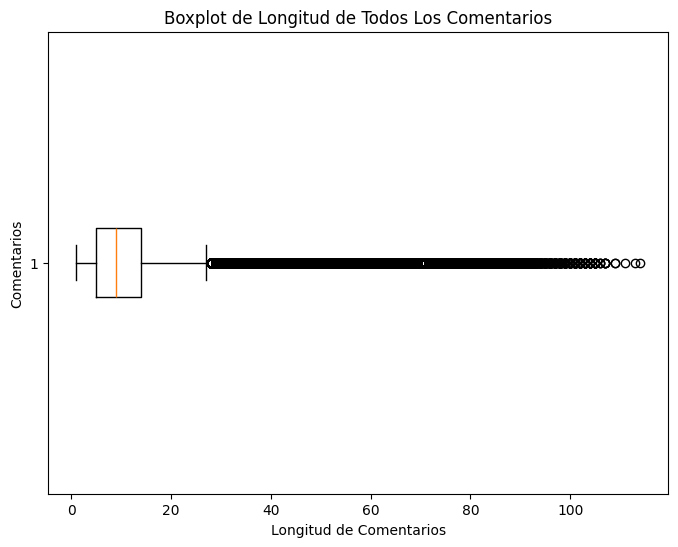

In [14]:
# Boxplot de Longitud de Todos los comentarios
# Crea una lista con la longitud de todos los Comentarios
tips_lengths = tips['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 6))
plt.boxplot(tips_lengths, vert=False, showfliers=True)
plt.title('Boxplot de Longitud de Todos Los Comentarios')
plt.xlabel('Longitud de Comentarios')
plt.ylabel('Comentarios')
plt.show()

Outliers arriba de la longitud de 110 aproximadamente

In [15]:
#Agregamos una fila con los años para gráficar el conteo de años más repetidos
tips['year'] = tips['date'].dt.year

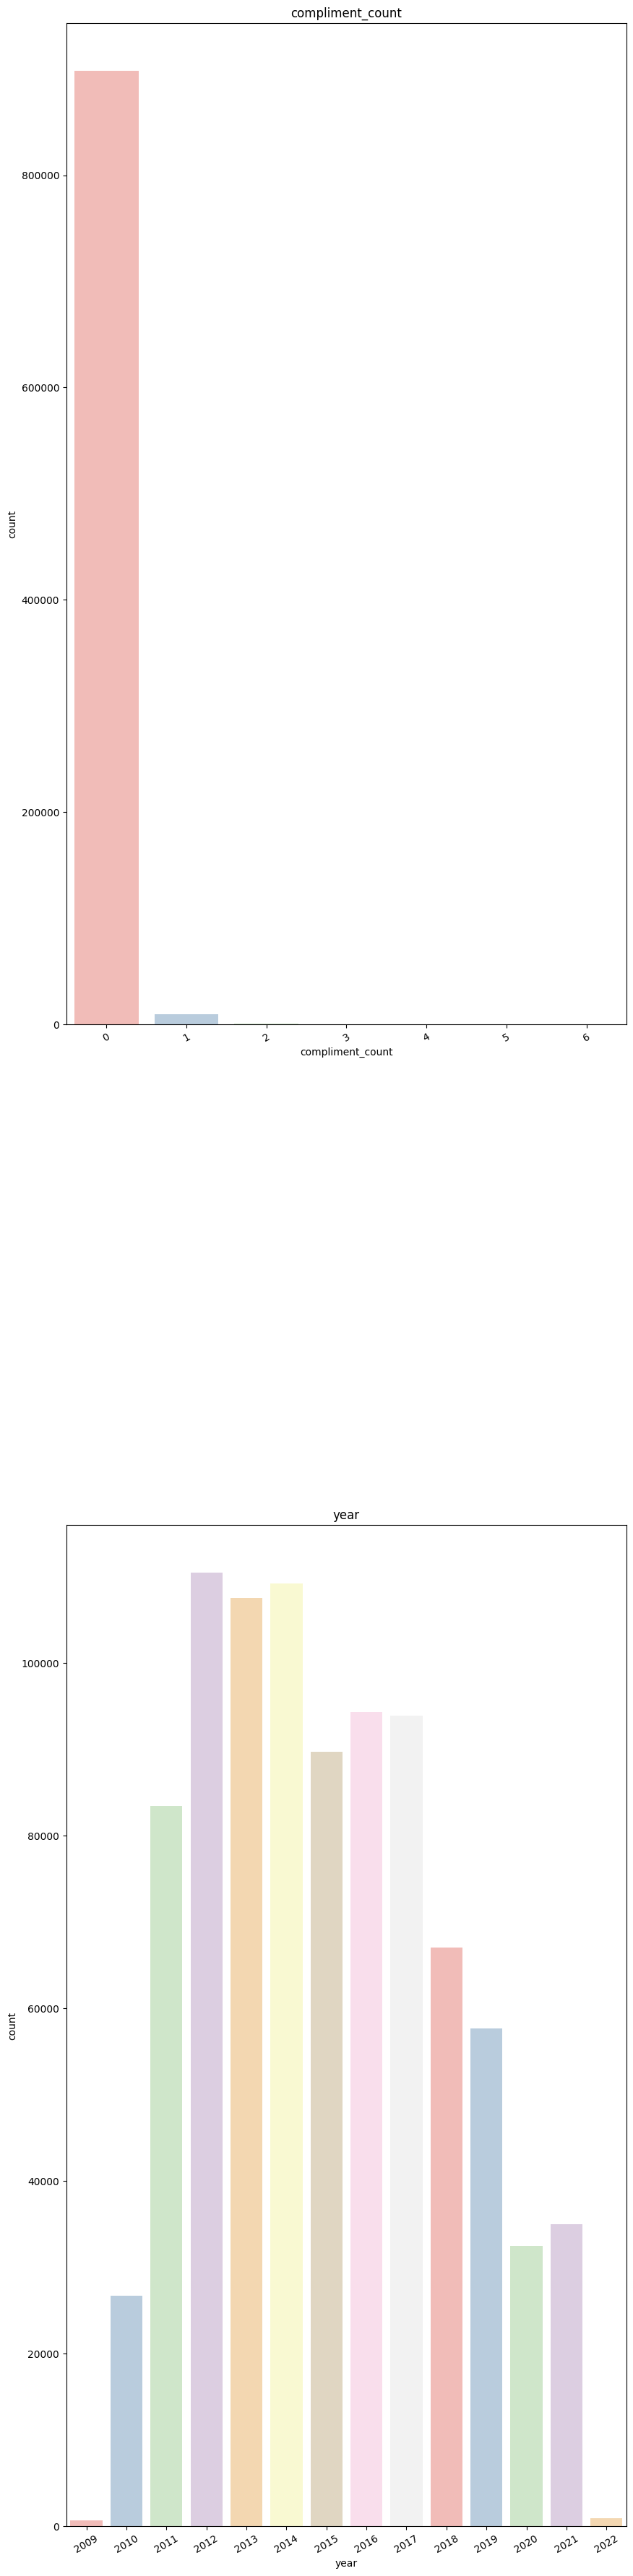

In [20]:
#Graficar subniveles de cada variable categórica
cols_cat = ["compliment_count","year"]

#Filtramos mensajes de advertencias para que nuestro resultado sea más prólijo
warnings.filterwarnings("ignore")

#Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(cols_cat),ncols =1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=tips,ax=ax[i], palette='Pastel1')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [39]:
# Identificamos los 10 usuarios más repetidos
usuarios_mas_repetidos = tips['user_id'].value_counts().head(10).index

# Filtramos el DataFrame para incluir solo los registros de esos 10 usuarios
df_filtrado = tips[tips['user_id'].isin(usuarios_mas_repetidos)]

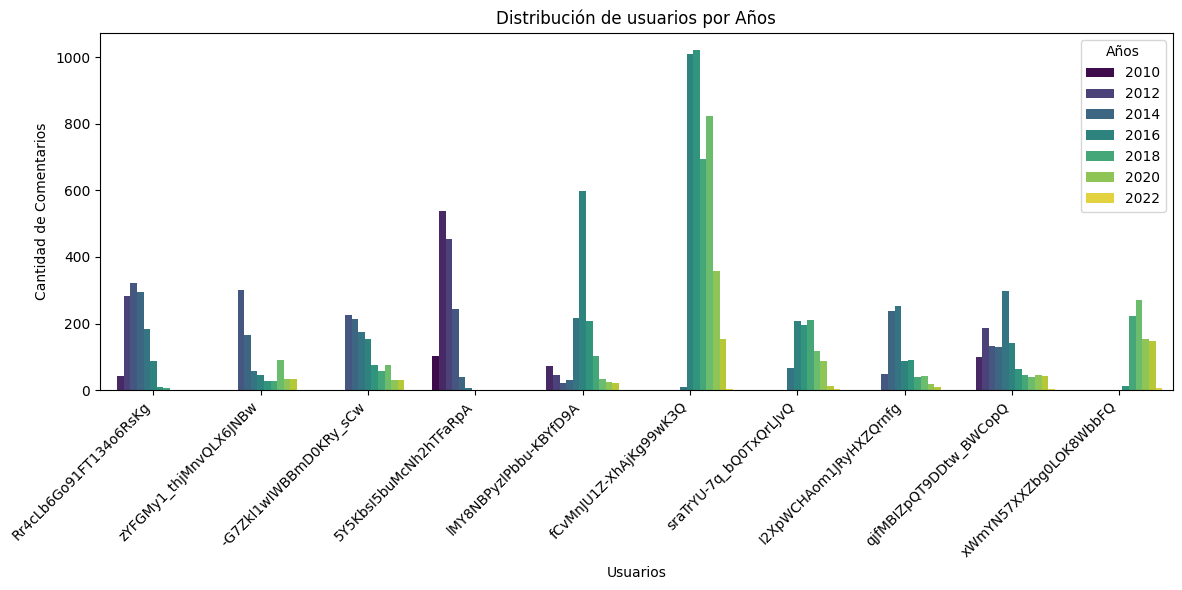

In [40]:
warnings.filterwarnings("ignore")
#Distribucion de Calificaciones por Años
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='user_id', hue='year', palette='viridis')
plt.title('Distribución de usuarios por Años')
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de Comentarios')
plt.legend(title='Años')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()



Se encuentra Variado los cometnarios según años en los usuarios de Yelp con más comentarios